In [126]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
import operator
import mpmath
mpmath.mp.dps = 500
def pval(x): return -mpmath.log10(1 - 0.5 * (1 + mpmath.erf(x/mpmath.sqrt(2))))

kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray

    # The following don't work well for people with defective color vision
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]
kch = kelly_colors_hex #['red' for i in range(200)]
figsize = (5, 5)
#axis_font_size = 15
#label_font_size = 20
#legend_font_size = 15
#fig = plt.figure(figsize=figsize)
#ax = fig.add_subplot(111)
#ax.axhline(y=-np.log10(0.00000005), ls='dashed', color = 'darkgrey', lw=2)

colors = kch#[kch[1], kch[2], kch[19]]
bgcolors = ['#FFB300','#00538A','#007D34','#B32851','#232C16' ]
lastbp = 0
xlabels = list()
xlabels_pos = list()
gtex_dict = dict()
cardio_dict = dict()
shuf_cardio_dict = dict()


chr_list = list(range(4)) + list(range(5,22))
for i in tqdm(range(0,1)):
    print(i)
    chrm = i + 1
    dirc = Path.cwd()/('output/chr' + str(chrm))
    pths = [pth for pth in dirc.iterdir() if "_rr.txt" in pth.name]
#     for pth in pths:
#         l = open(str(pth),"r").readlines()
#         rsids = [line.split("\t")[0] for line in l[1:]]
#         pvals = [-np.log10(float(line.split("\t")[5])) if float(line.split("\t")[5])!=0 
#                  else pval((float(line.split("\t")[2])-float(line.split("\t")[3]))/float(line.split("\t")[4]))
#                  for line in l[1:]]
#         for i in range(len(rsids)):
#             gtex_dict[rsids[i]] = pvals[i]

    dirc = Path.cwd()/('cardio_output/chr' + str(chrm))
    pths = [pth for pth in dirc.iterdir() if "_rr.txt" in pth.name]
    for pth in pths:
        l = open(str(pth),"r").readlines()
        rsids = [line.split("\t")[0] for line in l[1:]]
        pvals = [-np.log10(float(line.split("\t")[5])) if float(line.split("\t")[5])!=0 
                 else pval((float(line.split("\t")[2])-float(line.split("\t")[3]))/float(line.split("\t")[4]))
                for line in l[1:]]
        for i in range(len(rsids)):
            cardio_dict[rsids[i]] = pvals[i]
    
#     dirc = Path.cwd()/('shuf_cardio_output/chr' + str(chrm))
#     pths = [pth for pth in dirc.iterdir() if "_rr.txt" in pth.name]
#     for pth in pths:
#         l = open(str(pth),"r").readlines()
#         rsids = [line.split("\t")[0] for line in l[1:]]
#         pvals = [-np.log10(float(line.split("\t")[5])) if float(line.split("\t")[5])!=0 
#                 else pval((float(line.split("\t")[2])-float(line.split("\t")[3]))/float(line.split("\t")[4]))
#                 for line in l[1:]]
#         for i in range(len(rsids)):
#             shuf_cardio_dict[rsids[i]] = pvals[i]


blacklist = open("cardio_output/x","r").readlines()
for i in blacklist:
    try:
        del cardio_dict[i[:-1]]
        del shuf_cardio_dict[i[:-1]]
    except:
        pass

cardio_snps = len(cardio_dict.keys())
cardio_tuples = sorted(cardio_dict.items(), key=operator.itemgetter(1),reverse=True)

shuf_cardio_snps = len(shuf_cardio_dict.keys())
shuf_cardio_tuples = sorted(shuf_cardio_dict.items(), key=operator.itemgetter(1),reverse=True)

random_check_snps = list(cardio_dict.keys())

random.shuffle(random_check_snps)

In [127]:
toplot = []
random_toplot = []
shuf_toplot = []
check_x = []
check_random_x = []
check_shuf_x = []

sig_thres = -np.log10(0.05)
positives = []
i = 0 

while(i < cardio_snps):
    try:
        if(gtex_dict[cardio_tuples[i][0]] > sig_thres):
            positives.append(i)
    except:
        pass
    i = i + 1
    while(i < cardio_snps and cardio_tuples[i][1] == cardio_tuples[i-1][1]):
        try:
            if(gtex_dict[cardio_tuples[i][0]] > sig_thres):
                positives.append(i)
        except:
            pass
        i = i + 1
    check_x.append(i)
    
    toplot.append(len(positives))


shuf_cardio_positives = []
i = 0

while(i < shuf_cardio_snps):
    try:
        if(gtex_dict[shuf_cardio_tuples[i][0]] > sig_thres):
            shuf_cardio_positives.append(i)
    except:
        pass
    i = i + 1
    while(i < shuf_cardio_snps and shuf_cardio_tuples[i][1] == shuf_cardio_tuples[i-1][1]):
        try:
            if(gtex_dict[shuf_cardio_tuples[i][0]] > sig_thres):
                shuf_cardio_positives.append(i)
        except:
            pass
        i = i + 1
    check_shuf_x.append(i)
    
    shuf_toplot.append(len(shuf_cardio_positives))

random_positives = []
i =0
while(i < cardio_snps):
    try:
        if(gtex_dict[random_check_snps[i]] > sig_thres):
            random_positives.append(i)
    except:
        pass
    i = i + 1 
    while(i < cardio_snps and cardio_dict[random_check_snps[i]] == cardio_dict[random_check_snps[i-1]]):
        try:
            if(gtex_dict[random_check_snps[i]] > sig_thres):
                random_positives.append(i)
        except:
            pass
        i = i + 1
    check_random_x.append(i)
    
    random_toplot.append(len(random_positives))

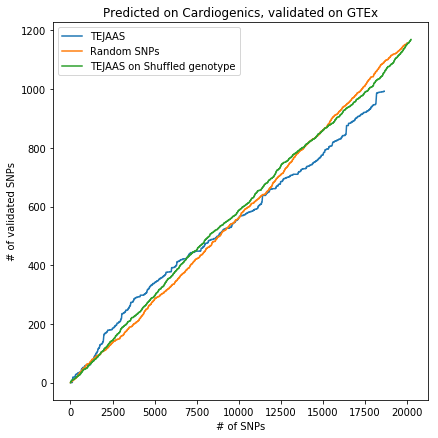

In [128]:
#plt.xlim([1500000, 3000000])
#plt.ylim([75000,175000])
plt.figure(figsize = (6, 6))
k = 0
m = 10000
offset = 10000
plt.title('Predicted on Cardiogenics, validated on GTEx')
plt.plot(check_x[k:m],toplot[k:m], label='TEJAAS')
plt.plot(check_random_x[k:m+offset], random_toplot[k:m+offset], label='Random SNPs')
plt.plot(check_shuf_x[k:m+offset], shuf_toplot[k:m+offset], label='TEJAAS on Shuffled genotype')
plt.tight_layout()
plt.legend()
plt.xlabel("# of SNPs")
plt.ylabel("# of validated SNPs")

plt.savefig("chr1_cardio_gtex_comparison_001.png", bbox_inches='tight')

#plt.ylim([0, 1000])
plt.show()

In [32]:
check_x[:10]

[10, 12, 13, 14, 15, 16, 17, 19, 41, 42]

In [33]:
toplot[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:

odd_snps = [i[0] for i in cardio_tuples[:8886]]


In [23]:
l = list(set(gtex_dict.keys()).intersection(odd_snps))
# f = open("odd_snps.txt","w")
# f.write("\n".join(l))
# f.close()

In [28]:
check = 0
for i in l:
    if(gtex_dict[i] > -np.log10(0.05)):
        check +=1
print(check)

534


In [ ]:
import scipy.stats
import mpmath

In [ ]:
scipy.stats.norm.cdf(0.353151, loc=0.169233, scale=0.0204404)

In [57]:
cardio_tuples[:1]

[('rs4725943',
  mpf('57.750808419586095074008247920831913179392603756687373593944330561007200844280322291332080322546389100390320093576161096479541839547033540651165857444241957940344898910721879379739201912384431156943050549229874774755062466913970182401643599128996912733457845334644271322087767006474359791166265613110390921038102336095884312545965102998755863785206150355606307053843643882653108549242009042538639244623204299377037243293119913557689085912630113613540111906293643964749416440936782089380521222507860109792'))]

[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [1]:
  #pvals = [-np.log10(float(line.split("\t")[5])) if float(line.split("\t")[5])!=0 
  #               else pval((float(line.split("\t")[2])-float(line.split("\t")[3]))/float(line.split("\t")[4]))
  #               for line in l[1:]]/

In [4]:
import numpy as np
np.logspace(-4,-1, 10)

array([0.0001    , 0.00021544, 0.00046416, 0.001     , 0.00215443,
       0.00464159, 0.01      , 0.02154435, 0.04641589, 0.1       ])